In [ ]:
#example_data/redcube1.png

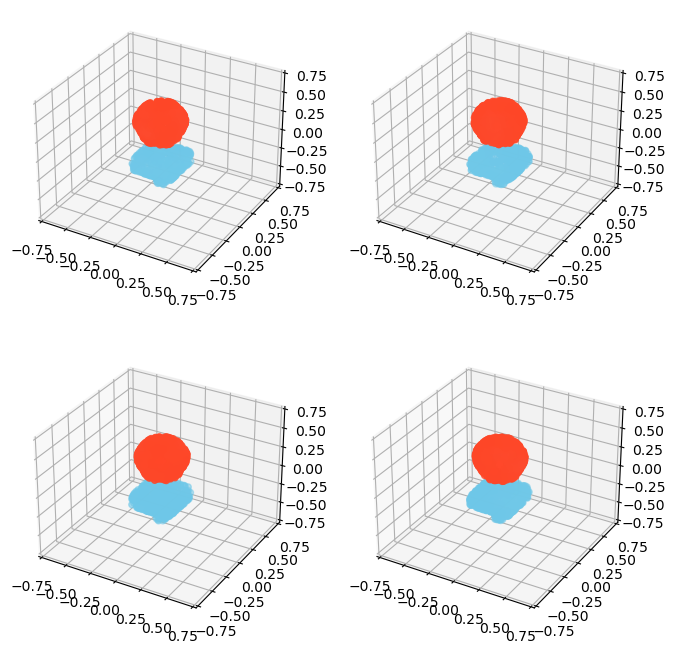

In [5]:


from PIL import Image
import torch
from tqdm.auto import tqdm

from point_e.models.configs    import MODEL_CONFIGS, model_from_config
from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.models.download   import load_checkpoint
from point_e.diffusion.sampler import PointCloudSampler
from point_e.util.plotting     import plot_point_cloud

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_name = 'base40M-imagevec'
model      = model_from_config(MODEL_CONFIGS[model_name], device)
diffusion  = diffusion_from_config(DIFFUSION_CONFIGS[model_name])
model.load_state_dict(load_checkpoint(model_name, device))
model.eval()

sampler = PointCloudSampler(
    device=device,
    models=[model],
    diffusions=[diffusion],
    num_points=[1024],       
    aux_channels=['R','G','B'],   
    guidance_scale=[3.0],          
    use_karras=[True],
    karras_steps=[64],
    sigma_min=[1e-3],
    sigma_max=[120],
    s_churn=[0],
)

img = Image.open('example_data/redcube1.png').convert('RGB').resize((256,256))

samples = sampler.sample_batch(
    batch_size=1,
    model_kwargs={'images': [img]}
)

pc  = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(
    pc,
    grid_size=2, 
    fixed_bounds=((-0.75,-0.75,-0.75),(0.75,0.75,0.75))
)
fig.set_size_inches(8,8)


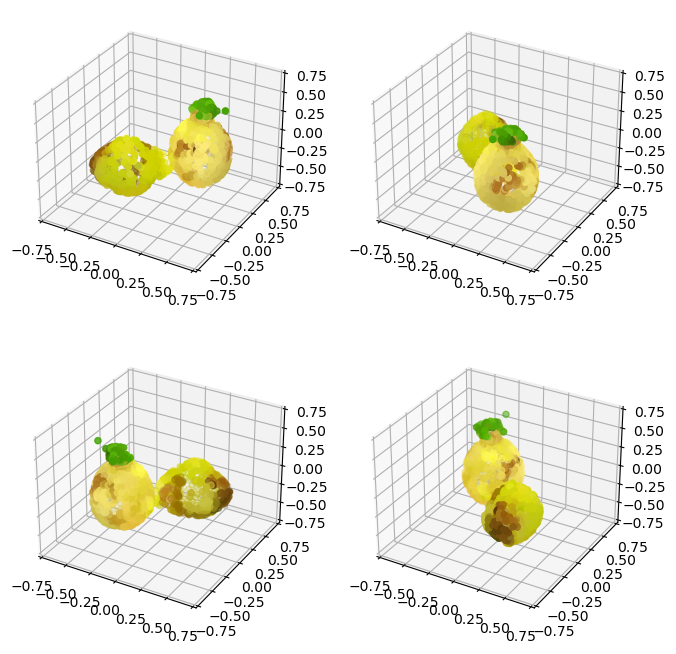

In [6]:
img = Image.open('example_data/banana.png').convert('RGB').resize((256,256))

samples = sampler.sample_batch(
    batch_size=1,
    model_kwargs={'images': [img]}
)

pc  = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(
    pc,
    grid_size=2, 
    fixed_bounds=((-0.75,-0.75,-0.75),(0.75,0.75,0.75))
)
fig.set_size_inches(8,8)
